In [18]:
import pandas as pd
import numpy as np
import geopandas as gpd
from glob import glob

import matplotlib.pyplot as plt

from shapely.geometry import Point

import matplotlib.pyplot as plt

In [2]:
paths = sorted(glob("/data/nature_run/fulldays_reduced/cpl_merged/*.pkl"))
npz_paths = sorted(glob("/data/nature_run/fulldays_reduced/*.npz"))

print(paths)

['/data/nature_run/fulldays_reduced/cpl_merged/cpl_all_20060315.pkl', '/data/nature_run/fulldays_reduced/cpl_merged/cpl_all_20060515.pkl', '/data/nature_run/fulldays_reduced/cpl_merged/cpl_all_20060615.pkl', '/data/nature_run/fulldays_reduced/cpl_merged/cpl_all_20060715.pkl', '/data/nature_run/fulldays_reduced/cpl_merged/cpl_all_20060803.pkl', '/data/nature_run/fulldays_reduced/cpl_merged/cpl_all_20060815.pkl', '/data/nature_run/fulldays_reduced/cpl_merged/cpl_all_20060915.pkl', '/data/nature_run/fulldays_reduced/cpl_merged/cpl_all_20061015.pkl', '/data/nature_run/fulldays_reduced/cpl_merged/cpl_all_20061115.pkl', '/data/nature_run/fulldays_reduced/cpl_merged/cpl_all_20061215.pkl']


In [3]:
npz_paths = sorted(glob("/data/nature_run/fulldays_reduced/*.npz"))
print(npz_paths)

['/data/nature_run/fulldays_reduced/all_20060315.npz', '/data/nature_run/fulldays_reduced/all_20060515.npz', '/data/nature_run/fulldays_reduced/all_20060615.npz', '/data/nature_run/fulldays_reduced/all_20060715.npz', '/data/nature_run/fulldays_reduced/all_20060803.npz', '/data/nature_run/fulldays_reduced/all_20060815.npz', '/data/nature_run/fulldays_reduced/all_20060915.npz', '/data/nature_run/fulldays_reduced/all_20061015.npz', '/data/nature_run/fulldays_reduced/all_20061115.npz', '/data/nature_run/fulldays_reduced/all_20061215.npz']


In [179]:
print(len(paths))
for i in range(10):
    print(paths[i])

10
/data/nature_run/fulldays_reduced/cpl_merged/cpl_all_20060315.pkl
/data/nature_run/fulldays_reduced/cpl_merged/cpl_all_20060515.pkl
/data/nature_run/fulldays_reduced/cpl_merged/cpl_all_20060615.pkl
/data/nature_run/fulldays_reduced/cpl_merged/cpl_all_20060715.pkl
/data/nature_run/fulldays_reduced/cpl_merged/cpl_all_20060803.pkl
/data/nature_run/fulldays_reduced/cpl_merged/cpl_all_20060815.pkl
/data/nature_run/fulldays_reduced/cpl_merged/cpl_all_20060915.pkl
/data/nature_run/fulldays_reduced/cpl_merged/cpl_all_20061015.pkl
/data/nature_run/fulldays_reduced/cpl_merged/cpl_all_20061115.pkl
/data/nature_run/fulldays_reduced/cpl_merged/cpl_all_20061215.pkl


IndexError: list index out of range

In [4]:
for i, j in zip(paths, npz_paths):
    print(i, j)

/data/nature_run/fulldays_reduced/cpl_merged/cpl_all_20060315.pkl /data/nature_run/fulldays_reduced/all_20060315.npz
/data/nature_run/fulldays_reduced/cpl_merged/cpl_all_20060515.pkl /data/nature_run/fulldays_reduced/all_20060515.npz
/data/nature_run/fulldays_reduced/cpl_merged/cpl_all_20060615.pkl /data/nature_run/fulldays_reduced/all_20060615.npz
/data/nature_run/fulldays_reduced/cpl_merged/cpl_all_20060715.pkl /data/nature_run/fulldays_reduced/all_20060715.npz
/data/nature_run/fulldays_reduced/cpl_merged/cpl_all_20060803.pkl /data/nature_run/fulldays_reduced/all_20060803.npz
/data/nature_run/fulldays_reduced/cpl_merged/cpl_all_20060815.pkl /data/nature_run/fulldays_reduced/all_20060815.npz
/data/nature_run/fulldays_reduced/cpl_merged/cpl_all_20060915.pkl /data/nature_run/fulldays_reduced/all_20060915.npz
/data/nature_run/fulldays_reduced/cpl_merged/cpl_all_20061015.pkl /data/nature_run/fulldays_reduced/all_20061015.npz
/data/nature_run/fulldays_reduced/cpl_merged/cpl_all_20061115.pk

In [6]:
# First NPZ

data = np.load(npz_paths[0])
print(list(data.keys()))
mh_data = data['scalar']
print(mh_data.shape)

['hsel', 'mh', 'scalar', 'table']
(5522308, 44)


In [22]:
# Load NPZ

index = 0

data = np.load(npz_paths[0])

mh_data = data['scalar']

geometry = [Point(lon, lat) for lon, lat in zip(mh_data[:,1], mh_data[:,0])]
mh_times = mh_data[:,-1].astype(int).astype(str)
mh_times = [x[-4:] for x in mh_times]
all_times = sorted(list(set(mh_times)))
print(all_times)

gdf_npz_uncorrected = gpd.GeoDataFrame(geometry=geometry)

gdf_npz_uncorrected['times_npz'] = mh_times
gdf_npz_uncorrected['index_npz'] = list(range(len(mh_times)))
gdf_npz_uncorrected.set_crs(epsg=4326, inplace=True)
print(gdf_npz_uncorrected.head())
print(gdf_npz_uncorrected.tail())

['0000', '0300', '0600', '0900', '1200', '1500', '1800', '2100']
                       geometry times_npz  index_npz
0  POINT (-180.00000 -45.00000)      0000          0
1  POINT (-179.93800 -45.00000)      0000          1
2  POINT (-179.87500 -45.00000)      0000          2
3  POINT (-179.81200 -45.00000)      0000          3
4  POINT (-179.75000 -45.00000)      0000          4
                           geometry times_npz  index_npz
5522303  POINT (178.62500 38.62500)      2100    5522303
5522304  POINT (178.68800 38.62500)      2100    5522304
5522305  POINT (178.75000 38.62500)      2100    5522305
5522306  POINT (178.81200 38.62500)      2100    5522306
5522307  POINT (178.62500 38.68800)      2100    5522307


In [16]:
# Load CPL

gdf_cpl_uncorrected = pd.read_pickle(paths[index])
gdf_cpl_uncorrected.head()

print(gdf_cpl_uncorrected.head())
print(gdf_cpl_uncorrected.tail())

   cpl_0         cpl_1         cpl_2         cpl_3         cpl_4  \
0   -0.0  3.851809e-07  4.037199e-07  4.159510e-07  4.301965e-07   
1   -0.0  3.836414e-07  4.012846e-07  4.330225e-07  4.250369e-07   
2   -0.0  3.851445e-07  4.043617e-07  4.083747e-07  4.221684e-07   
3   -0.0  3.813320e-07  4.040026e-07  4.172313e-07  4.384864e-07   
4   -0.0  3.847323e-07  4.103014e-07  4.122353e-07  4.275999e-07   

          cpl_5         cpl_6         cpl_7         cpl_8         cpl_9  ...  \
0  4.153502e-07  4.711740e-07  4.641689e-07  4.493346e-07  5.396949e-07  ...   
1  4.202643e-07  4.672969e-07  4.571378e-07  4.733692e-07  5.034269e-07  ...   
2  4.283106e-07  4.260496e-07  4.694006e-07  5.122949e-07  4.715084e-07  ...   
3  4.596241e-07  4.769400e-07  4.781560e-07  5.386214e-07  5.381712e-07  ...   
4  4.667760e-07  4.730636e-07  4.307845e-07  5.168392e-07  4.671118e-07  ...   

    cpl_726   cpl_727   cpl_728   cpl_729   cpl_730   cpl_731   cpl_732  \
0  0.000021  0.000040 -0.000121 -0.

In [76]:
gdf_npz = gdf_npz_uncorrected.to_crs(epsg=6933)
gdf_cpl = gdf_cpl_uncorrected.to_crs(epsg=6933)
#gdf_npz = gdf_npz_uncorrected.to_crs('EPSG:4326')
#gdf_cpl = gdf_cpl_uncorrected.to_crs('EPSG:4326')

#azimuthal_proj = "+proj=aeqd +datum=WGS84 +units=m +no_defs"
#gdf_npz = gdf_npz_uncorrected.to_crs(azimuthal_proj)
#gdf_cpl = gdf_cpl_uncorrected.to_crs(azimuthal_proj)



In [84]:

merged_df = []

for i in all_times:
    print(i)
    cpl_at_time = gdf_cpl[gdf_cpl['time'] == i]
    npz_at_time = gdf_npz[gdf_npz['times_npz'] == i]

    print(len(cpl_at_time),len(npz_at_time))  
    cpl_merged = cpl_at_time.sjoin_nearest(npz_at_time, how='left', distance_col='distances',
                                          max_distance=50000)
    print(len(cpl_merged))  
    merged_df.append(cpl_merged)
merged_df = pd.concat(merged_df, ignore_index=True)
merged_df.head()

0000
149278 732105
149409
0300
130331 608759
130399
0600
122813 542657
122913
0900
150725 651361
150853
1200
121047 659173
121160
1500
140485 695403
140657
1800
150347 849301
150491
2100
134844 783549
134982


,cpl_0,cpl_1,cpl_2,cpl_3,cpl_4,cpl_5,cpl_6,cpl_7,cpl_8,cpl_9,...,cpl_730,cpl_731,cpl_732,cpl_733,geometry,time,index_right,times_npz,index_npz,distances
0,-0.0,3.851809e-07,4.037199e-07,4.159510e-07,4.301965e-07,4.153502e-07,4.711740e-07,4.641689e-07,4.493346e-07,5.396949e-07,...,0.000012,0.000146,-0.000333,-0.000122,POINT (-17361548.637 -5180102.329),0000,1,0000,1,0.341565
1,-0.0,3.836414e-07,4.012846e-07,4.330225e-07,4.250369e-07,4.202643e-07,4.672969e-07,4.571378e-07,4.733692e-07,5.034269e-07,...,0.000117,0.000079,-0.000084,-0.000228,POINT (-17355469.660 -5180102.329),0000,2,0000,2,0.000000
2,-0.0,3.851445e-07,4.043617e-07,4.083747e-07,4.221684e-07,4.283106e-07,4.260496e-07,4.694006e-07,5.122949e-07,4.715084e-07,...,0.000021,0.000060,0.000156,0.000300,POINT (-17349390.683 -5180102.329),0000,3,0000,3,0.341565
3,-0.0,3.813320e-07,4.040026e-07,4.172313e-07,4.384864e-07,4.596241e-07,4.769400e-07,4.781560e-07,5.386214e-07,5.381712e-07,...,0.000174,-0.000017,-0.000084,0.000041,POINT (-17343408.875 -5180102.329),0000,4,0000,4,0.000000
4,-0.0,3.847323e-07,4.103014e-07,4.122353e-07,4.275999e-07,4.667760e-07,4.730636e-07,4.307845e-07,5.168392e-07,4.671118e-07,...,-0.000265,-0.000017,-0.000238,-0.000017,POINT (-17337427.067 -5180102.329),0000,5,0000,5,0.341565


In [88]:
a = merged_df['index_right']
print(a.shape, len(set(a)))

(1100864,) 570278


In [89]:
def stat(x):
    print(np.max(x), np.min(x), np.average(x), np.std(x), x.shape)

stat(merged_df['distances'])

789852.5834414406 0.0 26867.344562348782 58196.22213636731 (1100864,)


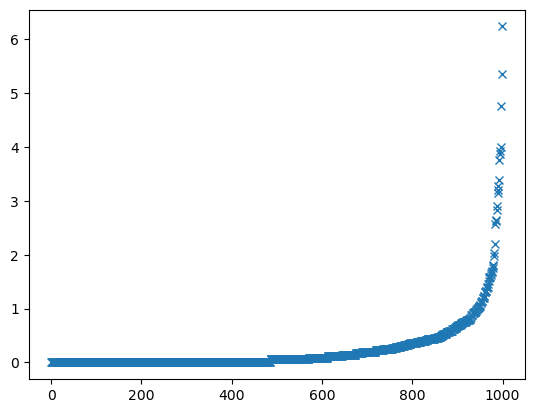

In [75]:
# FREEZE, this is in latlon
ind = np.random.randint(len(merged_df['distances']), size=1000)
plt.plot(sorted(merged_df['distances'].iloc[ind]), 'x')
plt.show()

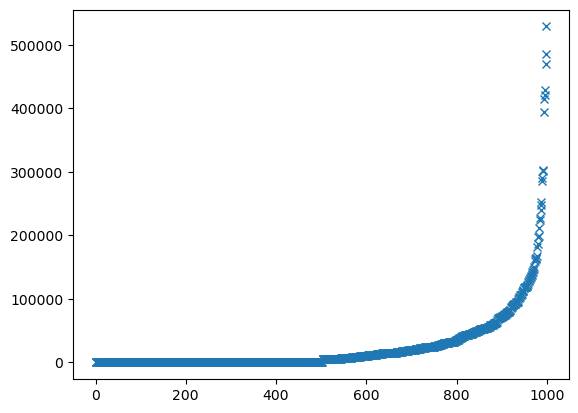

In [78]:
# this is in chatgpt recommended prs
ind = np.random.randint(len(merged_df['distances']), size=1000)
plt.plot(sorted(merged_df['distances'].iloc[ind]), 'x')
plt.show()

In [118]:
print(len(merged_df['distances']))
a = sorted(merged_df['distances'])
print(1100864//2)
a[550450]

1100864
550432


5982.175876400389

In [109]:
distances = merged_df['distances']
total_size = len(merged_df['distances'])
check = 6000


print(total_size, np.sum(distances<check), np.sum(distances<check)*100/total_size)

1100864 550891 50.04169452357421


In [174]:
#5900 seems to be the magic number
def stack_data(index, max_distance=100000):

    paths = sorted(glob("/data/nature_run/fulldays_reduced/cpl_merged/*.pkl"))
    npz_paths = sorted(glob("/data/nature_run/fulldays_reduced/*.npz"))

    # First NPZ
    data = np.load(npz_paths[index])    
    mh_data = data['scalar']
    
    geometry = [Point(lon, lat) for lon, lat in zip(mh_data[:,1], mh_data[:,0])]
    mh_times = mh_data[:,-1].astype(int).astype(str)
    mh_times = [x[-4:] for x in mh_times]

    gdf_npz_uncorrected = gpd.GeoDataFrame(geometry=geometry)
    gdf_npz_uncorrected['times_npz'] = mh_times
    gdf_npz_uncorrected['index_npz'] = list(range(len(mh_times)))
    gdf_npz_uncorrected.set_crs(epsg=4326, inplace=True)
    
    gdf_cpl_uncorrected = pd.read_pickle(paths[index])
    
    # Project, this seems weird
    gdf_npz = gdf_npz_uncorrected.to_crs(epsg=6933)
    gdf_cpl = gdf_cpl_uncorrected.to_crs(epsg=6933)

    print(f"gdf cpl len before {len(gdf_cpl)}")
    print(f"gdf npz len before {len(gdf_npz)}")
    
    merged_df = []

    all_times = sorted(list(set(mh_times)))
    for i in all_times:
        cpl_at_time = gdf_cpl[gdf_cpl['time'] == i]
        npz_at_time = gdf_npz[gdf_npz['times_npz'] == i]
        cpl_merged = cpl_at_time.sjoin_nearest(npz_at_time, how='left', 
                                               distance_col='distances',
                                               max_distance=max_distance)
        cpl_merged = cpl_merged.dropna(subset=['distances'])
        cpl_merged['index_npz'] = cpl_merged['index_npz'].astype(int)
        print(len(cpl_at_time), len(npz_at_time), len(cpl_merged))
        merged_df.append(cpl_merged)
    merged_df = pd.concat(merged_df, ignore_index=True)

    print(f"combined after {len(merged_df)}")

    good_data = test_gdf['index_npz'].to_numpy()
    cpl_data = test_gdf.iloc[:, 1:734].to_numpy()
      
    mh = data["mh"][good_data]
    hsel = data["hsel"][good_data]
    scalar = data["scalar"][good_data]
    table = data["table"][good_data]
    
    day = paths[index].split("_")[-1].split(".")[0]
    
    np.savez(f"/data/nature_run/fulldays_reduced/all_cpl_{day}.npz", 
             cpl=cpl_data, mh=mh, hsel=hsel, scalar=scalar, table=table)


    return
    


In [149]:
gdf_npz_uncorrected.tail()

,geometry,times_npz,index_npz
5522303,POINT (178.62500 38.62500),2100,5522303
5522304,POINT (178.68800 38.62500),2100,5522304
5522305,POINT (178.75000 38.62500),2100,5522305
5522306,POINT (178.81200 38.62500),2100,5522306
5522307,POINT (178.62500 38.68800),2100,5522307


In [163]:
test_gdf = stack_data(0)
test_gdf.tail()

gdf cpl len before 1099870
gdf npz len before 5522308
149278 732105 133834
130331 608759 116312
122813 542657 116484
150725 651361 142902
121047 659173 115605
140485 695403 133473
150347 849301 141705
134844 783549 126071
combined after 1026386


,cpl_0,cpl_1,cpl_2,cpl_3,cpl_4,cpl_5,cpl_6,cpl_7,cpl_8,cpl_9,...,cpl_730,cpl_731,cpl_732,cpl_733,geometry,time,index_right,times_npz,index_npz,distances
1026381,-0.0,7.754277e-07,7.896173e-07,8.246614e-07,8.148754e-07,8.114828e-07,8.302690e-07,8.064804e-07,8.861263e-07,8.765023e-07,...,0.000158,0.000245,0.000054,0.000150,POINT (16589658.395 4361070.156),2100,5490684.0,2100,5490684,0.342734
1026382,-0.0,7.734576e-07,7.773697e-07,7.914664e-07,7.925168e-07,8.181594e-07,8.044461e-07,7.941342e-07,8.322007e-07,7.995544e-07,...,-0.000205,0.000034,0.000158,0.000015,POINT (16589658.395 4367553.822),2100,5490690.0,2100,5490690,0.341565
1026383,-0.0,8.517026e-07,8.736445e-07,8.832484e-07,9.024213e-07,9.187420e-07,9.544394e-07,9.570736e-07,9.969104e-07,1.019613e-06,...,-0.000111,-0.000140,-0.000035,0.000128,POINT (16499153.923 4399689.099),2100,5490695.0,2100,5490695,8802.745081
1026384,-0.0,7.967120e-07,8.131145e-07,8.314615e-07,8.481555e-07,9.064373e-07,8.600471e-07,9.241865e-07,8.989743e-07,8.927630e-07,...,-0.000059,-0.000222,-0.000069,0.000335,POINT (16426789.213 4444338.579),2100,5490710.0,2100,5490710,6421.208510
1026385,-0.0,8.036392e-07,8.167688e-07,8.469322e-07,8.785225e-07,9.274866e-07,8.813377e-07,9.707051e-07,7.902064e-07,8.551338e-07,...,0.000075,-0.000135,-0.000337,0.000095,POINT (16432771.021 4444338.579),2100,5490711.0,2100,5490711,6421.208519


In [164]:
cpl_data = test_gdf.iloc[:, 1:734].to_numpy()
print(cpl_data.shape)



(1026386, 733)


In [165]:
good_data = test_gdf['index_npz'].to_numpy()
print(good_data)

print(len(good_data), np.sum(np.isnan(good_data)), len(good_data)-np.sum(np.isnan(good_data)))

[      1       2       3 ... 5490695 5490710 5490711]
1026386 0 1026386


In [158]:
a = np.argwhere(np.isnan(good_data))
print(a)
print(test_gdf.iloc[702, -10:])

[[    702]
 [    732]
 [    733]
 ...
 [1100812]
 [1100813]
 [1100814]]
cpl_730                                              0.000167
cpl_731                                              0.000043
cpl_732                                             -0.000062
cpl_733                                             -0.000303
geometry       POINT (-17180539.692469932 -5059618.083084716)
time                                                     0000
index_right                                               NaN
times_npz                                                 NaN
index_npz                                                 NaN
distances                                                 NaN
Name: 702, dtype: object


In [167]:

good_data = test_gdf['index_npz'].to_numpy()
cpl_data = test_gdf.iloc[:, 1:734].to_numpy()

data = np.load(npz_paths[index])    
mh = data["mh"][good_data]
hsel = data["hsel"][good_data]
scalar = data["scalar"][good_data]
table = data["table"][good_data]

day = "20060315"
np.savez(f"/data/nature_run/fulldays_reduced/all_cpl_{day}.npz", 
        cpl=cpl_data, mh=mh, hsel=hsel, scalar=scalar, table=table)



TypeError: save() got an unexpected keyword argument 'cpl'

In [171]:
np.savez(f"/data/nature_run/fulldays_reduced/all_cpl_{day}.npz", 
         cpl=cpl_data, mh=mh, hsel=hsel, scalar=scalar, table=table)

In [173]:
# Test npz
test_data = np.load(f"/data/nature_run/fulldays_reduced/all_cpl_{day}.npz")
print(list(test_data.keys()))
datasets = []
for i in test_data.keys():
    datasets.append(test_data[i])

for i in datasets:
    print(i.shape)

['cpl', 'mh', 'hsel', 'scalar', 'table']
(1026386, 733)
(1026386, 22)
(1026386, 1957)
(1026386, 44)
(1026386, 72, 3)


In [168]:
a="/data/nature_run/fulldays_reduced/cpl_merged/cpl_all_20060315.pkl"
print(a.split("_")[-1].split(".")[0])

20060315
